In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
size_range = range(1,16)

In [16]:
shape_column_names = ["dimension", "boundary", "interior", "area"]
squares_formula_dictionary = {"dimension": lambda n: n, 
                              "boundary": lambda n: 4*n, 
                              "interior": lambda n: (n-1)**2, 
                              "area": lambda n: n**2
                              }
squares_dataframe_content = {column_name:[squares_formula_dictionary[column_name](n) for n in size_range] 
                             for column_name in shape_column_names}
squares = pd.DataFrame(squares_dataframe_content, index=size_range)

In [21]:
# squares["area_formula"] = 1/2*squares.boundary + squares.interior - 1
squares

,dimension,boundary,interior,area
1,1,4,0,1
2,2,8,1,4
3,3,12,4,9
4,4,16,9,16
5,5,20,16,25
6,6,24,25,36
7,7,28,36,49
8,8,32,49,64
9,9,36,64,81
10,10,40,81,100


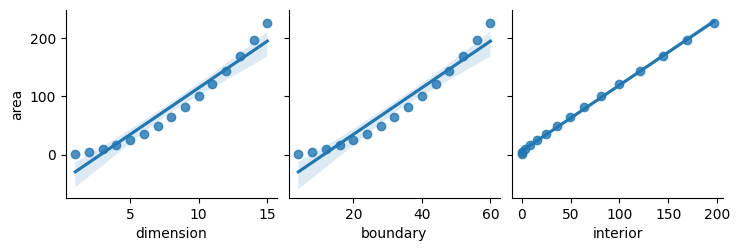

In [27]:
sns.pairplot(squares, x_vars=shape_column_names[:-1], y_vars=["area"], kind="reg")

In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(squares[["boundary", "interior"]], squares["area"])
squares["predicted_area"] = lr.predict(squares[["boundary", "interior"]])

In [25]:
squares

,dimension,boundary,interior,area,predicted_area
1,1,4,0,1,1.0
2,2,8,1,4,4.0
3,3,12,4,9,9.0
4,4,16,9,16,16.0
5,5,20,16,25,25.0
6,6,24,25,36,36.0
7,7,28,36,49,49.0
8,8,32,49,64,64.0
9,9,36,64,81,81.0
10,10,40,81,100,100.0


In [28]:
lr.coef_

array([0.5, 1. ])

In [29]:
lr.intercept_

-1.0000000000000142

In [32]:
squares["predicted_area"] = -1 + squares.boundary//2 + squares.interior

In [33]:
squares

,dimension,boundary,interior,area,predicted_area
1,1,4,0,1,1
2,2,8,1,4,4
3,3,12,4,9,9
4,4,16,9,16,16
5,5,20,16,25,25
6,6,24,25,36,36
7,7,28,36,49,49
8,8,32,49,64,64
9,9,36,64,81,81
10,10,40,81,100,100
